### https://imgaug.readthedocs.io/en/latest/source/examples_bounding_boxes.html

# Examples: Bounding Boxes

imgaug offers support for bounding boxes (aka rectangles, regions of interest). E.g. if an image is rotated during augmentation, the library can also rotate all bounding boxes on it correspondingly.

imgaug은 bounding boxes도 지원함 (굿)  
가령, image가 augmentation으로 회전되면 라이브러리가 알아서 BBox또 이에 맞춰서 바꿔줌

Features of the library’s bounding box support:

- Represent bounding boxes as objects (imgaug.BoundingBox).
- Augment bounding boxes.
- Draw bounding boxes on images.
- Move/shift bounding boxes on images, project them onto other images (e.g. onto the same image after resizing), compute their intersections/unions and IoU values.

# A simple example

The following example loads an image and places two bounding boxes on it. The image is then augmented to be brighter, slightly rotated and scaled. These augmentations are also applied to the bounding boxes. The image is then shown before and after augmentation (with bounding boxes drawn on it).

In [17]:
import imgaug as ia
from imgaug import augmenters as iaa
import matplotlib.pyplot as plt 
%matplotlib inline
ia.seed(1)

In [4]:
image = ia.quokka(size=(256, 256))

In [5]:
bbs = ia.BoundingBoxesOnImage([
    ia.BoundingBox(x1=65, y1=100, x2=200, y2=150),
    ia.BoundingBox(x1=150, y1=80, x2=200, y2=130)
], shape=image.shape)

In [6]:
seq = iaa.Sequential([
    iaa.Multiply((1.2, 1.5)), # change brightness, doesn't affect BBs
    iaa.Affine(
        translate_px={"x": 40, "y": 60},
        scale=(0.5, 0.7)
    ) # translate by 40/60px on x/y axis, and scale to 50-70%, affects BBs
])

In [8]:
# Make our sequence deterministic.
# We can now apply it to the image and then to the BBs and it will
# lead to the same augmentations.
# IMPORTANT: Call this once PER BATCH, otherwise you will always get the
# exactly same augmentations for every batch!
seq_det = seq.to_deterministic()

In [9]:
# Augment BBs and images.
# As we only have one image and list of BBs, we use
# [image] and [bbs] to turn both into lists (batches) for the
# functions and then [0] to reverse that. In a real experiment, your
# variables would likely already be lists.
image_aug = seq_det.augment_images([image])[0]
bbs_aug = seq_det.augment_bounding_boxes([bbs])[0]

In [10]:
# print coordinates before/after augmentation (see below)
# use .x1_int, .y_int, ... to get integer coordinates
for i in range(len(bbs.bounding_boxes)):
    before = bbs.bounding_boxes[i]
    after = bbs_aug.bounding_boxes[i]
    print("BB %d: (%.4f, %.4f, %.4f, %.4f) -> (%.4f, %.4f, %.4f, %.4f)" % (
        i,
        before.x1, before.y1, before.x2, before.y2,
        after.x1, after.y1, after.x2, after.y2)
    )

BB 0: (65.0000, 100.0000, 200.0000, 150.0000) -> (135.7971, 173.5507, 204.2754, 198.9130)
BB 1: (150.0000, 80.0000, 200.0000, 130.0000) -> (178.9130, 163.4058, 204.2754, 188.7681)


In [16]:
# image with BBs before/after augmentation (shown below)
image_before = bbs.draw_on_image(image, thickness=2)
image_after = bbs_aug.draw_on_image(image_aug, thickness=2, color=[0, 0, 255])

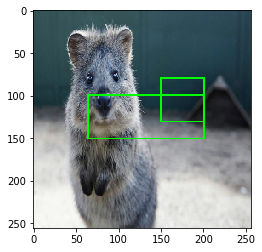

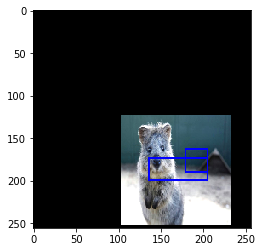

In [20]:
plt.imshow(image_before)
plt.show()
plt.imshow(image_after)
plt.show()

In [21]:
bbs

BoundingBoxesOnImage([BoundingBox(x1=65.0000, y1=100.0000, x2=200.0000, y2=150.0000, label=None), BoundingBox(x1=150.0000, y1=80.0000, x2=200.0000, y2=130.0000, label=None)], shape=(256, 256, 3))

In [37]:
bbs = ia.BoundingBoxesOnImage([], shape=image.shape)

In [38]:
bbs.bounding_boxes.append(ia.BoundingBox(x1=65.0000, y1=100.0000, x2=200.0000, y2=150.0000, label='None'))

In [40]:
bbs.shape

(256, 256, 3)

In [41]:
type(image)

numpy.ndarray